In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  

In [2]:
X_train=pd.read_csv("./Linear_X_Train.csv").values
y_train=pd.read_csv("./Linear_Y_Train.csv").values
X_train.shape
# y_train.shape

(3750, 1)

In [3]:
X_train

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

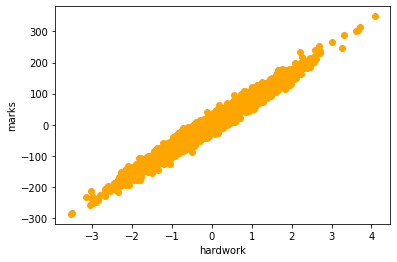

In [3]:
plt.scatter(X_train, y_train, color='orange')
plt.xlabel("hardwork")
plt.ylabel("marks")
plt.show()



# Preprocess -Col. Standardiazation
- makes G.D. Works faster (converge)<br>

suppose we have to predict the price of the hOUSE so area is round 200 age is less than 20 and number of bedrooms is 2 and its near grocery shop
#### All of these features are important in determining the price of a house. However, if we use them without any scaling, machine learning models might give more importance to the features with higher values. Models tend to perform better and converge faster when the features are on a relatively similar scale.
Without the presence of outliers, MinMaxScaler performs well in most cases. However, deep learning algorithms (e.g. neural networks) and regression algorithms are in favor of having features with normal distribution. StandardScaler is a better choice for such cases.
[See This](https://towardsdatascience.com/data-preprocessing-with-scikit-learn-standardization-and-scaling-cfb695280412)

In [4]:
mu=X_train.mean()
sigma=X_train.std()

In [5]:
mu #this data is already col standarize but we have to whenever have diff data

-0.03779466168006855

In [6]:
sig=sigma

In [7]:
sig

0.9920801322508517

In [8]:
X_train = (X_train - mu)/ sig

# Linear Regression

- it has 4 functions 

In [9]:
#theta will come here from train data after training
def hypothesis(x, theta): #we can too pass diff way theta 1,2 but if n then ?
    #so we take it as a vector 
    """
    Documentation ?
    theta : np array (2,1)
    x : scaler 
    
    return : prediction given input(x)
    """
    return theta[0] + theta[1]*x  #y_pred=theta[0] + theta[1]*x we can do this var for return too


In [10]:
t=[2,0]
type(t)

list

In [11]:
# https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch01.html

In [12]:
x=7.8

In [13]:
hypothesis(x,t) 

2.0

In [15]:
def error(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : total error for any hypothesis
    """
    
    m = X.shape[0]
    total_err = 0.0
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        total_err += (yhat_i - yi)**2
    
    return total_err/m


In [16]:
def gradient(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : np array gradient (2,1)
    """
    m  = X.shape[0]
    
    #grad=[grad[0], grad[1]]
    grad = np.zeros(2) # or we can np.array([0,0]) which shape is (2,)
    
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        grad[0] += (yhat_i - yi)
        grad[1] += (yhat_i - yi)*X[i]
        
    return grad/m


In [17]:
#this is our main function that is calling
#that calls gradient and error
def gradient_descent(X, Y, lr =0.1, max_itr = 100): #make lr=0.01 it will not converge 
    """
    parameters: 
        X - (3750, 1) 
        Y - (3750, 1) 
        lr - learning rate
        max_itr  - maximum iteration
    
    ----------------------------------
    
    return : 
        theta vector (2,1)
        error_list  
    """
    
    
    theta = np.zeros(2,) #we can intialize it with zeros or 
    #any random value np.random.randn(2,)
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, Y, theta)
        error_list.append(err[0]) # append this error to error list so we can plot
        
        grad = gradient(X, Y, theta)
        
        # Updation Rule
        theta[0]  = theta[0] - lr*grad[0]
        theta[1] = theta[1]  - lr*grad[1]
        
    return (theta, error_list) #it will return list if we not make too

In [18]:
np.random.randn(2,)

array([ 0.89582505, -1.11384806])

In [19]:
np.zeros(2,)

array([0., 0.])

In [20]:
(opt_theta, error_list) = gradient_descent(X_train, y_train)
#it will return optimum theta that converge and error with that theta 

In [21]:
opt_theta
#here theta1 is 0.68... and theta2 id 79...

array([ 0.6838508 , 79.90361453])

In [22]:
error_list

[6576.35005246196,
 5363.125102574931,
 4380.412893166487,
 3584.4160035456366,
 2939.658522952752,
 2417.404963672508,
 1994.3795806555281,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518652,
 819.770646978796,
 700.2957841336078,
 603.5211452290067,
 525.1336877162773,
 461.6398471309694,
 410.20983625687,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.33734761416457,
 267.4048116482566,
 252.87945751587242,
 241.11392066864,
 231.5838358223823,
 223.86446709691373,
 217.61177842928484,
 212.54710060850397,
 208.4447115736724,
 205.1217764554589,
 202.43019900970543,
 200.25002127864602,
 198.48407731648712,
 197.05366270713802,
 195.8950268735658,
 194.95653184837263,
 194.19635087796493,
 193.58060429193594,
 193.08184955725244,
 192.67785822215873,
 192.35062524073192,
 192.08556652577707,
 191.87086896666273,
 191.69696394378104,
 191.55610087524585,
 191.4420017897342,
 191.34958153046787,
 191.2747211204641,
 191.2140841883591

In [23]:
error_list[-5:]

[190.95559229260724,
 190.95558983779603,
 190.95558784939806,
 190.95558623879643,
 190.95558493420947]

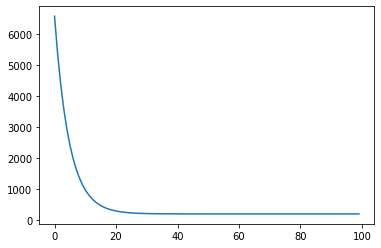

In [24]:
plt.plot(error_list) # increase itr or lr 
#increase lr from 0.01 to 0.1 10% so it get nearlly converge 
#as we can make only one line and this cant happen that 
#all pts lie in that when we plot scatter graph  

Text(0, 0.5, 'error')

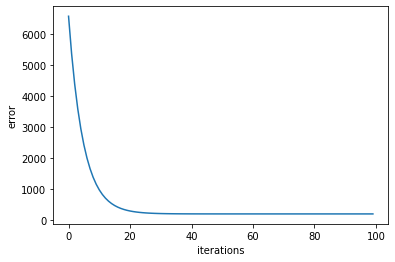

In [25]:
plt.plot(error_list) #this is irreducible error
plt.xlabel("iterations")
plt.ylabel("error")

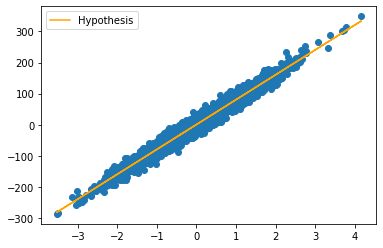

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train,hypothesis(X_train, opt_theta), color='orange', label="Hypothesis")
#opt theta is theta that is nearer to converge pt
plt.legend()
plt.show()
#basically we ghave predicted  y for training data 

In [28]:
X_test  = pd.read_csv("./Linear_X_Test.csv").values


In [29]:
#col standardization but we use 
# mu and sig are same from training data
X_test  = (X_test - mu ) / sig


In [30]:
y_pred = hypothesis(X_test, opt_theta)


In [31]:
df = pd.DataFrame(data=y_pred, columns=['y'])


In [32]:
df.to_csv("y_pred.csv", index=False)
#to convert into csv

 # Evalution


In [33]:
y_train.mean()


0.683868968015588

# R2 Score


In [34]:
y_pred_on_train = hypothesis(X_train, opt_theta)
#here we are calculating value of y for x and theta 1 and theta 2
# and then chaecking the r2 score on ypredicted vs y actual(y_train)

In [35]:
y_pred_on_train

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

In [36]:
def r2_score(Y, Y_):
    """
    calculate r2 score on y_hat and Y
    """
    num = np.sum((Y - Y_)**2)
    denom = np.sum( (Y - Y.mean() )**2 )
    
    score = 1 - (num/denom)
    
    return score

In [37]:
r2_score(y_train, y_pred_on_train)
#here we are testing R2 score on Y_train bcz we dont have y_test

0.9709612226971643

# SKLEARN - Linear Regression

In [38]:
# import 
from sklearn.linear_model import LinearRegression


# object
model = LinearRegression()
#if u want all your CPU core to work together then you put n_jobs=-1

In [39]:
# training - > fit

model.fit(X_train, y_train)

LinearRegression()

In [40]:
model.predict([[4.5]])
#it take 2d array for 1 val to find y 

array([[360.25968521]])

In [41]:
y_pred = model.predict(X_test)


#### Return the coefficient of determination R^2 of the prediction.

In [42]:
model.score(X_train, y_train)
# R2 xcore

0.9709612233822353

In [43]:
model.score(X_test,y_pred)

1.0

In [44]:
model.intercept_ # through sklearn


array([0.68386897])

In [45]:
model.coef_  # through sklearn

array([[79.90573694]])

In [46]:
opt_theta #through linear regression

array([ 0.6838508 , 79.90361453])

In [47]:
from sklearn.metrics import r2_score


## [Linear Regression](https://medium.com/datadriveninvestor/linear-regression-hypothesis-function-cost-function-and-gradient-descent-part-1-6cd865552923)